# Coursework 2: Generative Models

#### Instructions

Please submit on CATe a zip file named *CW2.zip* containing the following:
1. A version of this notebook containing your answers. Write your answers in the cells below each question.
2. Your trained models as *VAE_model.pth, DCGAN_model_D.pth, DCGAN_model_G.pth*

#### Working environment:

Similarly to the previous coursework, we recommend that you use Google Colaboratory in order to train the required networks.

**The deadline for submission is 19:00, Thursday 27th February, 2020**

### Setting up working environment

For this coursework you, will need to train a large network, therefore we recommend you work with Google Colaboratory, which provides free GPU time. You will need a Google account to do so.

Please log in to your account and go to the following page: https://colab.research.google.com. Then upload this notebook.

For GPU support, go to "Edit" -> "Notebook Settings", and select "Hardware accelerator" as "GPU".

You will need to install pytorch by running the following cell:

In [0]:
!pip install torch torchvision

## Introduction

For this coursework, you are asked to implement two commonly used generative models:
1. A **Variational Autoencoder (VAE)**
2. A **Deep Convolutional Generative Adversarial Network (DCGAN)**

For the first part you will the MNIST dataset https://en.wikipedia.org/wiki/MNIST_database and for the second the CIFAR-10 (https://www.cs.toronto.edu/~kriz/cifar.html).

## Part 1 (50 points)
1. For the first part, you are asked to implement a Variational Autoencoder on the MNIST dataset. You will be assesed by the following:
    - **loss function and proper explanations**. You will have to choose the right loss function by properly modelling the probability distributions involved. There are more than one accepted approaches. 
    - **reconstruction error**. You will need to achieve a low enough error in order to reconstruct the images of the dataset with relatively high fidelity. You will have to provide us with your best model's training and test loss curves (both the total loss and each individual term), a few reconstructed images and a few sampled images from the latent space of the VAE in the respective cells.
    - **qualitative results**. You have to provide us with certain qualitative results that are usually used to assess the quality of the learned representations (more info below)

 
## Part 2 (50 points)
2. For the DCGAN, The success of your models will be tested as follows:
    - **By the model's training error**. You will need to achieve relatively balanced errors for the generator and the discriminator of your model in order to sample realistic images from the generator. You will have to provide us with your best model's training losses curves, a discussion on how you concluded to the chosen architecture, and visualizations of generated samples in the respective cells. Your results do not have to be perfect, however a good discussion on the choice of architecture will be valued.
    - **By avoiding mode collapse**. A common problem of training GANs is that they end up generating only a few different samples (if not only one), rather than learning the whole distribution of the training data. This problem is referred to as mode collapse. You will need to make a discussion on whether you noticed mode collapse or not during your experimentation and if yes, how you addressed it.

# Part 1 - Variational Autoencoder

## Part 1.1 (25 points)
**Your Task:**

a. Implement the VAE architecture. You are free to choose either Multilayer Perceptrons (MLPs) or Convolutional Layers

You will need to define:
*  The hyperparameters
* The constructor
* encode
* reparametrize
* decode
* forward

b. Design an appropriate loss function. There are multiple accepted solutions. Explain your design choices based on the assumptions you make regarding the distribution of your data.

* Hint: this refers to the log likelihood as mentioned in the tutorial. Make sure these assumptions reflect on the values of your input data, i.e. depending on your choice you might need to do a simple preprocessing step.

* You are encouraged to experiment with the weighting coefficient $\beta$ and observe how it affects your training.


In [0]:
import os
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from torchvision import datasets, transforms
from torchvision.utils import save_image, make_grid
import torch.nn.functional as F
import matplotlib.pyplot as plt


def show(img):
    if torch.cuda.is_available():
        img = img.cpu()
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

# device selection
GPU = True
device_idx = 0
if GPU:
    device = torch.device("cuda:" + str(device_idx) if torch.cuda.is_available() else "cpu")
else:
    device = torch.device("cpu")
print(device)

# We set a random seed to ensure that your results are reproducible.
if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True
torch.manual_seed(0)

if not os.path.exists('./CW_VAE/MNIST'):
    os.makedirs('./CW_VAE/MNIST')


cuda:0


## Hyper-parameter selection

In [0]:
# *CODE FOR PART 1.1 IN THIS CELL*

### Choose the number of epochs, the learning rate and the batch size
num_epochs = 10
learning_rate  = 0.001 
batch_size = 128
### Choose a value for the size of the latent space
latent_dim = 5 

###
# Define here the any extra hyperparameters you used.
beta = 2
###

# Modify this line if you need to do any input transformations (optional).
transform = transforms.Compose([
     transforms.ToTensor(),
     transforms.Normalize(mean=(0.5,), std=(0.5,)) # change input to lie in range [-1, 1]
])

# Modify the denorm function in case you need to do any output transformation when visualizing your images

# for visualization
def denorm_for_tanh(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x

denorm = denorm_for_tanh

## Data loading


In [0]:
train_dat = datasets.MNIST(
    "data/", train=True, download=True, transform=transform
)
test_dat = datasets.MNIST("data/", train=False, transform=transform)

loader_train = DataLoader(train_dat, batch_size, shuffle=True)
loader_test = DataLoader(test_dat, batch_size, shuffle=False)

sample_inputs, _ = next(iter(loader_test))
fixed_input = sample_inputs[:32, :, :, :]

save_image(fixed_input, './CW_VAE/MNIST/image_original.png')

in_dim = fixed_input.shape[-1] * fixed_input.shape[-2]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


## Model Definition

In [0]:
# *CODE FOR PART 1.1a IN THIS CELL*

class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        #######################################################################
        #                       ** START OF YOUR CODE **
        #######################################################################

        #######################################################################
        #                       ** END OF YOUR CODE **
        ####################################################################### 
        
        # define network layers
        self.fc1 = nn.Linear(in_features=in_dim, out_features=400)
        self.fc21 = nn.Linear(in_features=400, out_features=latent_dim)
        self.fc22 = nn.Linear(in_features=400, out_features=latent_dim)
        self.fc3 = nn.Linear(in_features=latent_dim, out_features=400)
        self.fc4 = nn.Linear(in_features=400, out_features=in_dim)
        
    def encode(self, x):
        #######################################################################
        #                       ** START OF YOUR CODE **
        #######################################################################
        
        x = self.fc1(x)
        x = F.relu(x)
        return self.fc21(x), self.fc22(x) # output mean and log-variance

        #######################################################################
        #                       ** END OF YOUR CODE **
        ####################################################################### 
    
    def reparametrize(self, mu, logvar):
        #######################################################################
        #                       ** START OF YOUR CODE **
        #######################################################################

        std_dev = torch.exp(0.5*logvar)
        noise_var = torch.randn_like(std_dev) # make a random sample (unit normal)
        return mu + std_dev*noise_var # scale/shift my latent distribution's variance/mean

        #######################################################################
        #                       ** END OF YOUR CODE **
        ####################################################################### 
        
    def decode(self, z):
        #######################################################################
        #                       ** START OF YOUR CODE **
        #######################################################################

        #######################################################################
        #                       ** END OF YOUR CODE **
        ####################################################################### 

        z = self.fc3(z) # sample latent vector + pass through network
        z = F.relu(z)
        z = self.fc4(z)
        return torch.tanh(z) # output activation 
    
    def forward(self, x):
        #######################################################################
        #                       ** START OF YOUR CODE **
        #######################################################################

        # forward pass
        mu, logvar = self.encode(x.view(-1, in_dim))
        z = self.reparametrize(mu, logvar)
        return self.decode(z), mu, logvar 

        #######################################################################
        #                       ** END OF YOUR CODE **
        ####################################################################### 

model = VAE().to(device)
params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total number of parameters is: {}".format(params))
print(model)
# optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Total number of parameters is: 634794
VAE(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (fc21): Linear(in_features=400, out_features=5, bias=True)
  (fc22): Linear(in_features=400, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=400, bias=True)
  (fc4): Linear(in_features=400, out_features=784, bias=True)
)


In [0]:
#######################################################################
#                       ** MY CODE **
#######################################################################

# called in training loop
def store_test_loss(model):
  test_loss_total = 0
  test_loss_KL = 0
  test_loss_recon = 0
  model.eval()
  with torch.no_grad():
    for batch_idx, data in enumerate(loader_test):
      img, _ = data
      img = img.view(img.size(0), -1)
      img = img.to(device)
      batch_recon, mu, logvar = model(img)
      recon_loss, KL_loss = loss_function_VAE(batch_recon, img, mu, logvar)
      total_loss = recon_loss + KL_loss
      test_loss_total += total_loss.item()
      test_loss_KL += KL_loss.item()
      test_loss_recon += recon_loss.item()
  total_loss_test.append(test_loss_total / len(loader_test.dataset))
  KL_loss_test.append(test_loss_KL / len(loader_test.dataset))
  recon_loss_test.append(test_loss_recon / len(loader_test.dataset))
  
#######################################################################
#                       ** END OF MY CODE **
#######################################################################

## Training loop

In [0]:
# *CODE FOR PART 1.1b IN THIS CELL*

total_loss_train = []
KL_loss_train = []
recon_loss_train = []

total_loss_test = []
KL_loss_test = []
recon_loss_test = []

def loss_function_VAE(x_recon, x, mu, logvar):
        #######################################################################
        #                       ** START OF YOUR CODE **
        #######################################################################

        batch_size = x.shape[0]
        MSE = F.mse_loss(x_recon, x.view(-1, 784), reduction='sum') / batch_size 
        KLD = -0.5 * torch.sum(1 + logvar -mu.pow(2) - logvar.exp()) / batch_size
        assert KLD > 0

        return MSE, KLD*beta  

        #######################################################################
        #                       ** END OF YOUR CODE **
        ####################################################################### 

model.train()
for epoch in range(num_epochs):     
        #######################################################################
        #                       ** START OF YOUR CODE **
        #######################################################################

        train_loss_total = 0
        train_loss_KL = 0
        train_loss_recon = 0
        for batch_idx, data in enumerate(loader_train):
          img, _ = data
          img = img.view(img.size(0), -1)
          img = img.to(device)
          optimizer.zero_grad()
          # forward pass
          batch_recon, mu, logvar = model(img)
          recon_loss, KL_loss = loss_function_VAE(batch_recon, img, mu, logvar)
          total_loss = recon_loss + KL_loss
          # backprop
          total_loss.backward()
          train_loss_total += total_loss.item()
          train_loss_KL += KL_loss.item()
          train_loss_recon += recon_loss.item()
          optimizer.step()
        # track loss history on training set
        total_loss_train.append(train_loss_total / len(loader_train.dataset))
        KL_loss_train.append(train_loss_KL / len(loader_train.dataset))
        recon_loss_train.append(train_loss_recon / len(loader_train.dataset))
        # print train loss
        print('epoch [{}/{}], train loss:{:.4f}'.format(epoch + 1, num_epochs, train_loss_total / len(loader_train.dataset)))
        # track loss history on test test
        store_test_loss(model)

        #######################################################################
        #                       ** END OF YOUR CODE **
        ####################################################################### 

# save the model 
torch.save(model.state_dict(), './CW_VAE/MNIST/VAE_model.pth')

epoch [1/10], train loss:1.1981
epoch [2/10], train loss:0.9727
epoch [3/10], train loss:0.9305
epoch [4/10], train loss:0.9064
epoch [5/10], train loss:0.8907
epoch [6/10], train loss:0.8781
epoch [7/10], train loss:0.8698
epoch [8/10], train loss:0.8617
epoch [9/10], train loss:0.8552
epoch [10/10], train loss:0.8500


### Your explanations about the loss function here:

The VAE objective function was designed to have two terms: one which maximises the reconstruction liklihood, and another which drives the learned distribution, *q(z|x)*, to be like the true prior *p(z)*, that is, to resemble the same distribution. Because a Gaussian was used to generate *z*, the MSE loss was chosen to penalize the reconstruction error, i.e., zero loss corresponds to a mean and variance that perfectly describe the data (are equal to the true mean/variance). The second term was modelled using the KL divergence, and can be computed in closed form if both distributions are Gaussian. The Gaussian-distributed *z* was chosen to have zero mean and a covariance equal to the identity matrix, simplifying the calculation of the KL loss (enables a sum over the dimensions, given no cross-correlation to take into account). NOTE: please also refer to answers to 1.2 (b) for additional explanations about the loss function. 

## Part 1.2 (10 points)

a. Plot your loss curves (6 in total, 3 for the training set and 3 for the test set): total loss, reconstruction log likelihood loss, KL loss (x-axis: epochs, y-axis: loss). 

b. Provide a brief analysis of your loss curves. What do you observe in the behaviour of the log-likelihood loss and the KL loss (increasing/decreasing)? Can you intuitively explain if this behaviour is desirable? Have you observed posterior collapse during traing (i.e. when the KL is too small during the early stages of training)? If yes, how did you mitigate it? How did this phenomenon reflect on your output samples? 

c. Visualize a subset of the images of the test set and their reconstructions as well as a few generated samples. Most of the code for this part is provided. You only need to call the forward pass of the model for the given inputs (might vary depending on your implementation) .Please deliver the notebook including the outputs of the cells below.


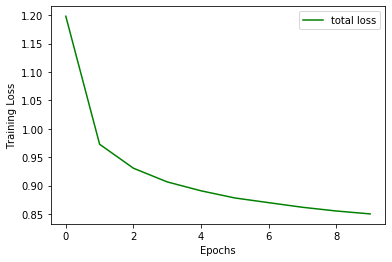

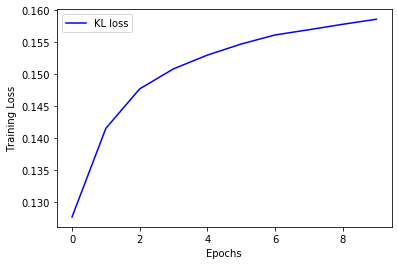

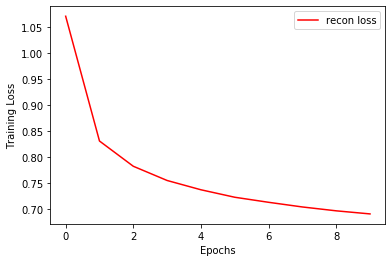

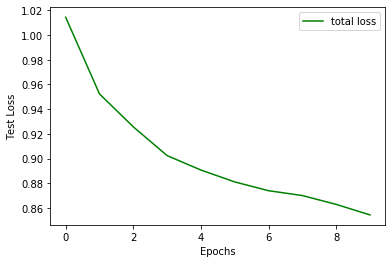

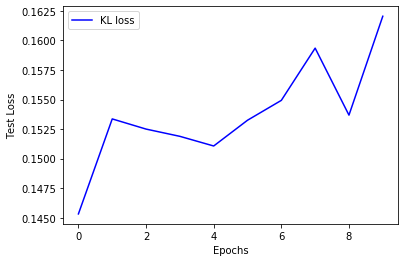

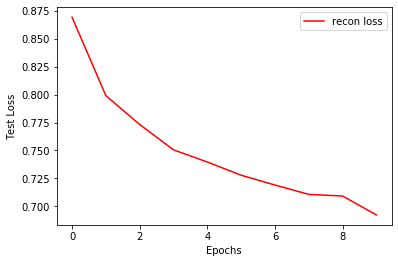

In [0]:
# *CODE FOR PART 1.2a IN THIS CELL*

plt.plot(total_loss_train, label='total loss', color='green')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(loc='best')
plt.show()

plt.plot(KL_loss_train, label='KL loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(loc='best')
plt.show()

plt.plot(recon_loss_train, label='recon loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(loc='best')
plt.show()

plt.plot(total_loss_test, label='total loss', color='green')
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.legend(loc='best')
plt.show()

plt.plot(KL_loss_test, label='KL loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.legend(loc='best')
plt.show()

plt.plot(recon_loss_test, label='recon loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.legend(loc='best')
plt.show()

### Your answer to 1.2b here:
During training, the log-likelihood decreases with the number of epochs, exhibiting an elbow point (period of less sharp decrease) after the first few epochs. The decrease in the loss corresponds to a reduction in the MSE between the training examples and the reconstructed images, where the reconstructions have been produced by sampling from the latent distribution, and then passing the result through the decoder network (hidden layers, activation). This behaviour is desirable as we want our network to get better at producing latent variables that, when sampled, will lead to outputs that are similar to the training data.

The KL loss, the second term of the objective function, encourages the learned distribution to converge to the prior distribution for *z*, which has been defined to follow a unit Gaussian, so that we can compute the KL divergence between two Gaussians in closed form. This term acts like a regularizer, ensuring sufficient variance in the posterior. Because we are performing (stochastic) gradient *descent*, the signs in the original VAE objective are flipped, so an increase in this term is desirable. 

To combat posterior collapse, which was observed during initial training experiments, a weighting term (hyperparamter) was used to increase this regularization, i.e., to ensure that the variability in *z* was not ignored. This had the effect of improving the new images generated by the decoder network, but too high a value was observed to negatively impact the reconstructions. Using a relatively low number (5) of dimensions for *z* (10 used first) also led to higher fidelity images.  



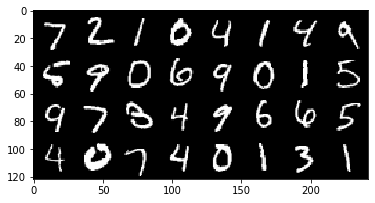

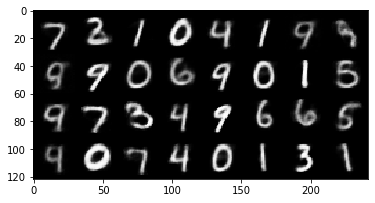

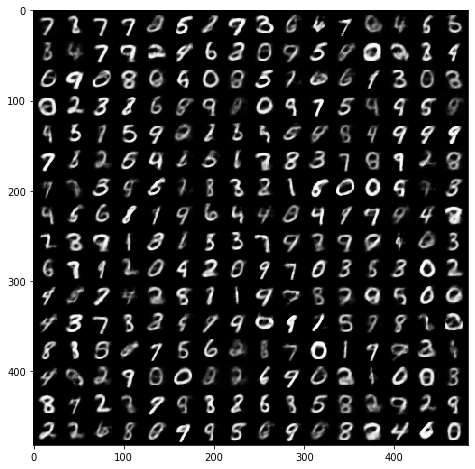

In [0]:
# *CODE FOR PART 1.2c IN THIS CELL*

# load the model
model.load_state_dict(torch.load('./CW_VAE/MNIST/VAE_model.pth'))
sample_inputs, _ = next(iter(loader_test))
fixed_input = sample_inputs[0:32, :, :, :]

# visualize the original images of the last batch of the test set
img = make_grid(denorm(fixed_input), nrow=8, padding=2, normalize=False,
                range=None, scale_each=False, pad_value=0)
plt.figure()
show(img)

with torch.no_grad():
    # visualize the reconstructed images of the last batch of test set
    
    #######################################################################
    #                       ** START OF YOUR CODE **
    #######################################################################

    fixed_input = fixed_input.view(fixed_input.size(0), -1)
    fixed_input = fixed_input.to(device)
    recon_batch, _, _ = model(fixed_input)
    recon_batch = recon_batch.view(-1, 1, 28, 28)

    #######################################################################
    #                       ** END OF YOUR CODE **
    ####################################################################### 
    
    recon_batch = recon_batch.cpu()
    recon_batch = make_grid(denorm(recon_batch), nrow=8, padding=2, normalize=False,
                            range=None, scale_each=False, pad_value=0)
    plt.figure()
    show(recon_batch)
    
model.eval()
n_samples = 256
z = torch.randn(n_samples,latent_dim).to(device)
with torch.no_grad():
    #######################################################################
    #                       ** START OF YOUR CODE **
    #######################################################################

    samples = model.decode(z).view(-1, 1, 28, 28)
    
    #######################################################################
    #                       ** END OF YOUR CODE **
    ####################################################################### 
    
    samples = samples.cpu()
    save_image(denorm(samples), './CW_VAE/MNIST/image_samples.png')
    samples = make_grid(denorm(samples), nrow=16, padding=2, normalize=False,
                            range=None, scale_each=False, pad_value=0)
    plt.figure(figsize = (8,8))
    show(samples)



## Part 1.3 (15 points)

### Qualitative analysis of the learned representations

In this question you are asked to qualitatively assess the representations that your model has learned. In particular:

a. Extract the latent representations of the test set and visualize them using T-SNE (https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding, https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) or PCA. What do you observe? Discuss the structure of the visualized representations. Please use different colours for each digit class.

b. Perform a linear interpolation in the latent space of the autoencoder by choosing any two digits from the test set. What do you observe regarding the transition from on digit to the other?

In [0]:
# *CODE FOR PART 1.3a IN THIS CELL*

from sklearn.manifold import TSNE
import numpy as np

# re-load model
model.load_state_dict(torch.load('./CW_VAE/MNIST/VAE_model.pth'))

# extract z
Z_batches = []
label_batches = []
for batch_idx, data in enumerate(loader_test):
  img, label = data
  img = img.to(device)
  mu, logvar = model.encode(img.view(-1, in_dim))
  z = model.reparametrize(mu, logvar).detach().cpu().numpy()
  Z_batches.append(z)
  label_batches.append(label.detach().cpu().numpy())

Z = []
labels = []
for b, l in zip(Z_batches, label_batches):
  for z in b:
    Z.append(z)
  for label in l:
    labels.append(label)

# create embeddings 
embedded = TSNE(n_components=2).fit_transform(np.array(Z))

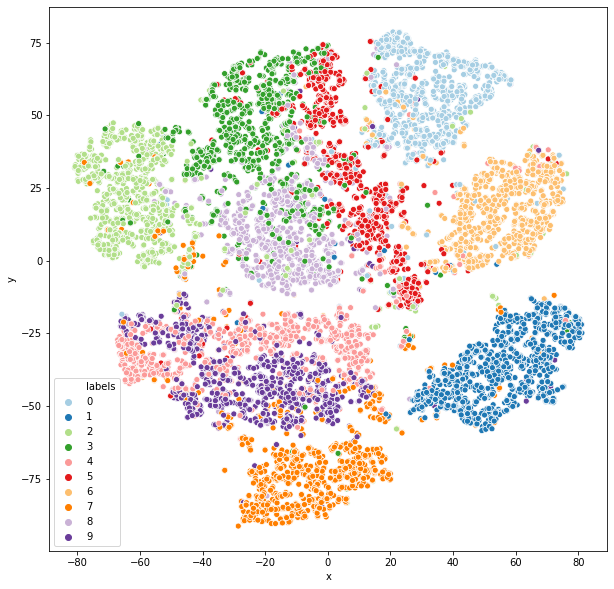

In [0]:
# plot embeddings 
import seaborn as sns
import pandas as pd

data_dict = {'x': embedded[:, 0], 'y': embedded[:, 1], 'labels': labels}
df = pd.DataFrame(data_dict)

plt.figure(figsize = (10,10))
sns.scatterplot(x='x', y='y', data=df, hue='labels', legend='full', palette='Paired')
plt.show()

### Your answer to 1.3a here:
The plot above shows the result of applying the dimensionality reduction algorithim *TSNE* to the extracted *z*-values for the test set. The main thing to observe is that nearby points in the 2D embedding space correspond to similar reconstructed images. We also observe relatively smooth clusters of points, which can be attributed to the effect of combining the reconstruction loss and the KL loss, with the KL loss implicity enforcing the network to learn broader/less correlated latent distributions. This trade off can be influenced through the beta coefficient. Interestingly, the points corresponding to the digits 9 (purple) and 4 (light pink) overlap to a higher degree than the other clusters, something we can observe in the reconstructed images, where the network has reconstructed two 4s as 9s (see image grid above). 


In [0]:
# *CODE FOR PART 1.3b IN THIS CELL*

# NOTE: Ran out of time! 

### Your answer to 1.3b here:

Ran out of time! Ideally, what we observe, is a smooth transition between two digits (e.g., 8 and 0), having extracted the latent representations and computed a linear interpolation between them using *alpha* and *(1-alpha)* for a set of values of alpha in the range (0, 1). 

## Part 2 - Deep Convolutional GAN

In this task, your main objective is to train a DCGAN (https://arxiv.org/abs/1511.06434) on the CIFAR-10 dataset. You should experiment with different architectures, tricks for stability in training (such as using different activation functions, batch normalization, different values for the hyper-parameters, etc.). In the end, you should provide us with: 

- your best trained model (which we will be able to run), 
- some generations for the fixed latent vectors $\mathbf{z}\sim \mathcal{N}\left(\mathbf{0}, \mathbf{I}\right)$ we have provided you with (train for a number of epochs and make sure there is no mode collapse), 
- plots with the losses for the discriminator $D$ and the generator $G$ as the training progresses and explain whether your produced plots are theoretically sensible and why this is (or not) the case. 
- a discussion on whether you noticed any mode collapse, where this behaviour may be attributed to, and explain what you did in order to cope with mode collapse. 

_Clarification: You should not be worrying too much about getting an "optimal" performance on your trained GAN. We want you to demonstrate to us that you experimented with different types of DCGAN variations, report what difficulties transpired throughout the training process, etc. In other words, if we see that you provided us with a running implementation, that you detail different experimentations that you did before providing us with your best one, and that you have grapsed the concepts, you can still get full marks. The attached model does not have to be perfect._

### Part 2.1 (30 points)
**Your Task**: 

a. Implement the DCGAN architecture. Fill in the missing parts in the cells below in order to complete the Generator and Discriminator classes. You will need to define:

- The hyperparameters
- The constructors
- `decode`
- `discriminator`

b. visualize images sampled from your best model's generator.

c. Discuss the experimentations which led to your final architecture. You can plot losses or generated results by other architectures that you tested to back your arguments (but this is not necessary to get full marks).

For b. the code is already given. Make sure that the version of the notebook you deliver includes these results. 

Recomendations for experimentation:
- use the architecture that you implemented for the Autoencoder of Part 1 (encoder as discriminator, decoder as generator).
- use the architecture desribed in the DCGAN paper (https://arxiv.org/abs/1511.06434).

Some general reccomendations:
- add several convolutional layers (3-4).
- accelerate training with batch normalization after every convolutional layer.
- use the appropriate activation functions. 
- Generator module: the upsampling can be done with various methods, such as nearest neighbor upsampling (`torch.nn.Upsample`) or transposed convolutions(`torch.nn.ConvTranspose2d`). 
- Discriminator module: Experiment with batch normalization (`torch.nn.BatchNorm2d`) and leaky relu (`torch.nn.LeakyReLu`) units after each convolutional layer.

Try to follow the common practices for CNNs (e.g small receptive fields, max pooling, RELU activations), in order to narrow down your possible choices.

The number of epochs that will be needed in order to train the network will vary depending on your choices. As an advice, we recommend that while experimenting you should allow around 20 epochs and if the loss doesn't sufficiently drop, restart the training with a more powerful architecture. You don't need to train the network to an extreme if you don't have the time.

In [0]:
import os
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from torchvision import datasets, transforms
from torchvision.utils import save_image, make_grid
import torch.nn.functional as F
import matplotlib.pyplot as plt

def denorm(x, channels=None, w=None ,h=None, resize = False):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    if resize:
        if channels is None or w is None or h is None:
            print('Number of channels, width and height must be provided for resize.')
        x = x.view(x.size(0), channels, w, h)
    return x

def show(img):
    if torch.cuda.is_available():
        img = img.cpu()
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

# device selection
GPU = True
device_idx = 0
if GPU:
    device = torch.device("cuda:" + str(device_idx) if torch.cuda.is_available() else "cpu")
else:
    device = torch.device("cpu")
print(device)

# We set a random seed to ensure that your results are reproducible.
if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True
torch.manual_seed(0)

if not os.path.exists('./CW_DCGAN'):
    os.makedirs('./CW_DCGAN')

cpu


### Data loading

In [0]:
batch_size = 128  # changed to 128 
NUM_TRAIN = 49000

transform = transforms.Compose([
     transforms.Resize(64), # re-sized
     transforms.ToTensor(),
     transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])



data_dir = './datasets'

cifar10_train = datasets.CIFAR10(data_dir, train=True, download=True,
                             transform=transform)
cifar10_val = datasets.CIFAR10(data_dir, train=True, download=True,
                           transform=transform)
cifar10_test = datasets.CIFAR10(data_dir, train=False, download=True, 
                            transform=transform)

loader_train = DataLoader(cifar10_train, batch_size=batch_size, 
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
loader_val = DataLoader(cifar10_val, batch_size=batch_size, 
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, 50000)))
loader_test = DataLoader(cifar10_test, batch_size=batch_size)


Extracting ./datasets/cifar-10-python.tar.gz to ./datasets
Files already downloaded and verified
Files already downloaded and verified


### Hyper-parameter selection

In [0]:
# *CODE FOR PART 2.1 IN THIS CELL*

### Choose the number of epochs, the learning rate
#   and the size of the Generator's input noise vetor.
num_epochs = 25
learning_rate  = 0.0002
latent_vector_size = 100 
###

# Define here other hyperparameters that you used.
gen_features = 64
disc_features = 64
channels = 3

In [0]:
# *CODE FOR PART 2.1 IN THIS CELL*

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        #######################################################################
        #                       ** START OF YOUR CODE **
        #######################################################################

        # 100 --> (512, 4, 4) 
        self.conv0 = nn.Sequential(
          nn.ConvTranspose2d(in_channels=latent_vector_size, out_channels=gen_features*8, 
            kernel_size=(4,4), stride=1, padding=0, bias=False),
          nn.BatchNorm2d(gen_features*8),
          nn.ReLU(True)
        )

        # (512, 4, 4) --> (256, 8, 8)
        self.conv1 = nn.Sequential(
          nn.ConvTranspose2d(in_channels=gen_features*8, out_channels=gen_features*4, 
            kernel_size=(4,4), stride=2, padding=1, bias=False),
          nn.BatchNorm2d(gen_features*4),
          nn.ReLU(True),
        )

        # (256, 8, 8) --> (128, 16, 16)
        self.conv2 = nn.Sequential(
          nn.ConvTranspose2d(in_channels=gen_features*4, out_channels=gen_features*2, 
            kernel_size=(4,4), stride=2, padding=1, bias=False),
          nn.BatchNorm2d(gen_features*2),
          nn.ReLU(True)
        )

        # (128, 16, 16) --> (64, 32, 32)
        self.conv3 = nn.Sequential(
          nn.ConvTranspose2d(in_channels=gen_features*2, out_channels=gen_features, 
            kernel_size=(4,4), stride=2, padding=1, bias=False),
          nn.BatchNorm2d(gen_features),
          nn.ReLU(True),
        )

        # (64, 32, 32) --> (3, 64, 64)
        self.conv4 = nn.Sequential(
          nn.ConvTranspose2d(in_channels=gen_features, out_channels=channels, 
            kernel_size=(4,4), stride=2, padding=1, bias=False),
          nn.Tanh()
        )
        
        #######################################################################
        #                       ** END OF YOUR CODE **
        ####################################################################### 

    def decode(self, z):
        #######################################################################
        #                       ** START OF YOUR CODE **
        #######################################################################

        z = self.conv0(z)
        z = self.conv1(z)
        z = self.conv2(z)
        z = self.conv3(z)
        z = self.conv4(z)  

        #######################################################################
        #                       ** END OF YOUR CODE **
        ####################################################################### 
        return z

    def forward(self, z):
        return self.decode(z)


class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        #######################################################################
        #                       ** START OF YOUR CODE **
        #######################################################################

        #######################################################################
        #                       ** END OF YOUR CODE **
        ####################################################################### 
        
        # (3, 64, 64) --> (64, 32, 32)
        self.conv1 = nn.Sequential(
          nn.Conv2d(in_channels=3, out_channels=disc_features, kernel_size=(4,4), 
            stride=2, padding=1, bias=False),
          nn.LeakyReLU(0.2, True)
        )

        # (64, 32, 32) --> (128, 16, 16)
        self.conv2 = nn.Sequential(
          nn.Conv2d(in_channels=disc_features, out_channels=disc_features*2, kernel_size=(4,4), 
            stride=2, padding=1, bias=False),
          nn.BatchNorm2d(disc_features*2),
          nn.LeakyReLU(0.2, True)
        )

        # (128, 16, 16) --> (256, 8, 8)
        self.conv3 = nn.Sequential(
          nn.Conv2d(in_channels=disc_features*2, out_channels=disc_features*4, kernel_size=(4,4), 
            stride=2, padding=1, bias=False),
          nn.BatchNorm2d(disc_features*4),
          nn.LeakyReLU(0.2, True)
        )

        # (256, 8, 8) --> (512, 4, 4)
        self.conv4 = nn.Sequential(
          nn.Conv2d(in_channels=disc_features*4, out_channels=disc_features*8, kernel_size=(4,4), 
            stride=2, padding=1, bias=False),
          nn.BatchNorm2d(disc_features*8),
          nn.LeakyReLU(0.2, True)
        )

        # (512, 4, 4) --> 1
        self.conv5 = nn.Sequential(
          nn.Conv2d(in_channels=disc_features*8, out_channels=1, kernel_size=(4,4), 
            stride=1, padding=0, bias=False),
          nn.Sigmoid()
        )

    def discriminator(self, x):
        #######################################################################
        #                       ** START OF YOUR CODE **
        #######################################################################

        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        out = self.conv5(x)

        #######################################################################
        #                       ** END OF YOUR CODE **
        ####################################################################### 
        
        return out

    def forward(self, x):
        out = self.discriminator(x)
        return out.view(-1, 1).squeeze(1)

### Initialize Model and print number of parameters

You can use method `weights_init` to initialize the weights of the Generator and Discriminator networks. Otherwise, implement your own initialization, or do not use at all. You will not be penalized for not using initialization.

In [0]:
# custom weights initialization called on netG and netD
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

In [0]:
use_weights_init = True

# instantiate generator and apply weight initialization
model_G = Generator().to(device)
if use_weights_init:
    model_G.apply(weights_init)
params_G = sum(p.numel() for p in model_G.parameters() if p.requires_grad)
print("Total number of parameters in Generator is: {}".format(params_G))
print(model_G)
print('\n')

# instantiate discriminator and apply weight initialization
model_D = Discriminator().to(device)
if use_weights_init:
    model_D.apply(weights_init)
params_D = sum(p.numel() for p in model_D.parameters() if p.requires_grad)
print("Total number of parameters in Discriminator is: {}".format(params_D))
print(model_D)
print('\n')

print("Total number of parameters is: {}".format(params_G + params_D))

Total number of parameters in Generator is: 3838848
Generator(
  (conv0): Sequential(
    (0): ConvTranspose2d(132, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv1): Sequential(
    (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv3): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(i

### Define loss function

In [0]:
criterion = nn.BCELoss(reduction='mean')
def loss_function(out, label):
    loss = criterion(out, label)
    return loss

### Choose and initialize optimizers

In [0]:
# setup optimizer
# You are free to add a scheduler or change the optimizer if you want. We chose one for you for simplicity.
beta1 = 0.5
optimizerD = torch.optim.Adam(model_D.parameters(), lr=learning_rate, betas=(beta1, 0.999))
optimizerG = torch.optim.Adam(model_G.parameters(), lr=learning_rate, betas=(beta1, 0.999))

### Define fixed input vectors to monitor training and mode collapse.

In [0]:
fixed_noise = torch.randn(batch_size, latent_vector_size, 1, 1, device=device)

real_label = 1
fake_label = 0

### Train

In [0]:
train_losses_G = []
train_losses_D = []

for epoch in range(num_epochs):
    for i, data in enumerate(loader_train, 0):
        train_loss_D = 0
        train_loss_G = 0
        
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################device
        # train with real
        model_D.zero_grad()
        real_cpu = data[0].to(device)
        batch_size = real_cpu.size(0)å
        label = torch.full((batch_size,), real_label, device=device)

        output = model_D(real_cpu)
        errD_real = loss_function(output, label)
        errD_real.backward()
        D_x = output.mean().item()

        # train with fake
        noise = torch.randn(batch_size, latent_vector_size, 1, 1, device=device)
        fake = model_G(noise)
        label.fill_(fake_label)
        output = model_D(fake.detach())
        errD_fake = loss_function(output, label)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        train_loss_D += errD.item()
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        model_G.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        output = model_D(fake)
        errG = loss_function(output, label)
        errG.backward()
        D_G_z2 = output.mean().item()
        train_loss_G += errG.item()
        optimizerG.step()

        print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f / %.4f'
              % (epoch, num_epochs, i, len(loader_train),
                 errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

    if epoch == 0:
        save_image(denorm(real_cpu.cpu()).float(), './CW_DCGAN/real_samples.png')
    
    fake = model_G(fixed_noise)
    save_image(denorm(fake.cpu()).float(), './CW_DCGAN/fake_samples_epoch_%03d.png' % epoch)
    train_losses_D.append(train_loss_D / len(loader_train))
    train_losses_G.append(train_loss_G / len(loader_train))
            
# save losses and models
torch.save(model_G.state_dict(), './CW_DCGAN/DCGAN_model_G.pth')
torch.save(model_D.state_dict(), './CW_DCGAN/DCGAN_model_D.pth')

In [0]:
# DISCUSS THE SELECTION OF THE ARCHITECTURE IN THIS CELL*


**DISCUSSION: Architecture**

I selected to implement somthing very similar to the DCGAN architecture in the paper by Radford et al. The generator network consisted of a series of transpose convolution layers, where at each layer the width and height of the input tensor is increased until it matches the (re-sized) image dimensions. This upsampling (applied to all layers after the first reshaping layer) was achieved with a stride of 2 and padding of 1, removing the need for any pooling operations and allowing the network to learn its own spatial sampling. The kernels were chosen to be size 4, and were observed not to cause any overlapping issues. As recommended, the tanh activation was applied to the final layer, with the ReLU activation applied to the intermmediate layers. Batch normalization was used to help gradient flow, except in the final layer, where the model is expected to learn the correct mean and variance of the data. The discrimiator was chosen to follow the architecture of a CNN classifier, with a sigmoid activation in the final layer. The capacity of the discriminator was chosen to be similar to the generator. Kernels of size 4 were used for the convolutions. Instead of ReLU activations, the recommedation to use leaky ReLUs (with slope 0.2) was followed. Batch normalisation was used in the intermediate layers, but not at the first layer for the reason stated above. Due to the instability of training GANs, the same optimizer (Adam) and hyperparamters as described in the paper were applied (learning rate of 0.0002, momentum of 0.5, much lower than the default). The size of the random vector was chosen to be 100.

The chosen architecture was observed to work reasonably well in practice, but a number of experiments were made to identify any sources of further improvement. In one adjustment, dropout was applied the discriminator layers. However, this had the effect of producing images that were pure noise, so it was removed. In another, weight initialization was only applied to the discriminator, and not the generator. However, this broke the balance between the generator and discriminator, with the generator loss growing with the number of epochs, so the final model had weight initialization applied to both networks. Training was observed to be sensitive to the size of the random vector, so it was left at 100.   

### Generator samples

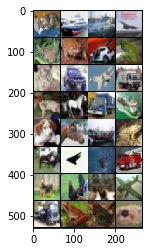

In [0]:
it = iter(loader_test)
sample_inputs, _ = next(it)
fixed_input = sample_inputs[0:32, :, :, :]

# visualize the original images of the last batch of the test set
img = make_grid(denorm(fixed_input), nrow=4, padding=2, normalize=False,
                range=None, scale_each=False, pad_value=0)
show(img)

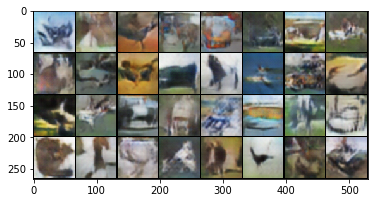

In [0]:
# load the model
model_G.load_state_dict(torch.load('./CW_DCGAN/DCGAN_model_G.pth'))
input_noise = torch.randn(batch_size, latent_vector_size, 1, 1, device=device)

with torch.no_grad():
    # visualize the generated images
    generated = model_G(input_noise).cpu()
    generated = make_grid(denorm(generated)[:32], nrow=8, padding=2, normalize=False, 
                        range=None, scale_each=False, pad_value=0)
    show(generated)

### Part 2.2 (10 points)

### Train losses curves
**Your task:**


Plot the losses curves for the discriminator $D$ and the generator $G$ as the training progresses and explain whether the produced curves are theoretically sensible and why this is (or not) the case (x-axis: epochs, y-axis: loss).

The code for generating the plot is already given. Make sure that the version of the notebook you deliver includes these results.

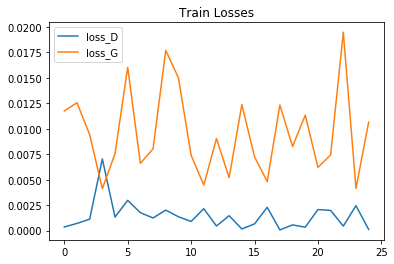

In [0]:
# Loss plot corresponding to FINAL model 
import matplotlib.pyplot as plt
plt.plot(list(range(0, np.array(train_losses_D).shape[0])), np.array(train_losses_D), label='loss_D')
plt.plot(list(range(0, np.array(train_losses_G).shape[0])), np.array(train_losses_G), label='loss_G')
plt.legend()
plt.title('Train Losses')
plt.show()

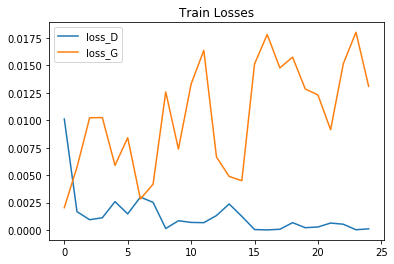

In [0]:
# Loss plot for one experiment, shows convergence failure
import matplotlib.pyplot as plt
plt.plot(list(range(0, np.array(train_losses_D).shape[0])), np.array(train_losses_D), label='loss_D')
plt.plot(list(range(0, np.array(train_losses_G).shape[0])), np.array(train_losses_G), label='loss_G')
plt.legend()
plt.title('Train Losses')
plt.show()

In [0]:
# ANSWER FOR PART 2.2 IN THIS CELL*


**DISCUSSION: Loss plots**

*Please refer to the first plot above when reading the below. The second is left to show the result of some experimentation.* 

While not desirable, the loss plot shown is theoretically plausible. Neither the generator nor the discriminator is dominating the other, i.e., they are in a rough equilibirum. The generator loss oscillates between 0.5 and 2.0, which, from my research, is to be expected. However, the discriminator loss is lower than what we expect to see with a more stable GAN. The final architecture was ran for 25 epochs, and, unfortunately, there was not enough time to see whether the model would stabilize with more training epochs. The high variance in the generator does suggest some mode collapse may be occuring, but it is hard to seperate this behaviour from the stochastic nature of the training.



### Part 2.3 (10 points) 
**Your task:** 

Based on the images created by your generator using the `fixed_noise` vector during training, provide a discussion on whether you noticed any mode collapse, where this behaviour may be attributed to, and explain what you did in order to cope with mode collapse.

In [0]:
# ANSWER FOR PART 2.3 IN THIS CELL*



**DISCUSSSION: Mode collapse**

Mode collape results from different values of the noise vector being mapped to the same or similar points in the ouput space. The generated images during training were created from a batch of fixed noise vectors, so if mode collapse was happening, we would expect all the images to appear the same or very similar. While this was not the case, the  images created after the final epoch, as well as those sampled, were not as diverse/rich as we would like them to be. In order to reduce the chance of mode collapse, the discriminator and generator networks were designed to roughly balance each other, while the recommended activations were used to prevent gradients from vanishing and hence the generator being unable to escape from a mode. 





